## konlpy로 리뷰 전체 명사로 분해

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from parse import load_dataframes

In [3]:
data = load_dataframes()

In [4]:
review_df = data['reviews']

In [5]:
review_df.head()

,index,id,store,user,score,content,reg_time
0,1,1,15,68632,5,전포 윗길에 새로 생긴! 호주에서 온 쉐프가 직접 요리하는 호주식 레스토랑!,1970-01-01 00:00:00
1,2,2,18,389728,5,샌드위치 내용물도 알차게 들어있고 맛있었어요 가성비 추천,1970-01-01 00:00:00
2,3,3,19,68716,4,홈플러스 1층 매장 푸드코트 내 있는 매장인데 계란찜정식은 처음보고 시켜봣는데 사진...,1970-01-01 00:00:00
3,4,4,37,774353,2,"전 여기 5년전에 가봤었는데 그때 기억은 별로였어요\n단체손님이 많았고, 차려지는건...",1970-01-01 00:00:00
4,5,5,38,115682,3,친구들끼리 술 간단하게마시러 감. 스끼다시 괜찮지만 회 양이 조금 부족한 느낌. 맛...,2019-03-15 22:16:47


In [6]:
import konlpy
from konlpy.tag import Hannanum
from konlpy.tag import Twitter

In [7]:
s_review = review_df.store.unique()

In [8]:
tot_rev_df = pd.DataFrame(columns=["store", "contents"])

In [9]:
str=""
for content in review_df[review_df.store==68].content:
    str = str +" "+content
print(str)

 매장은 아담하고깔끔하구 주문과동시에 음식셋팅 ㅎㅎ
80센티롱~~소세지가 철판에버터지글지글소리와함께 
후각을강타 ㅋㅋ   직원분이 롱~소세지를 반은부대찌개로 반은철판에잘라주신다~~^^무엇보다 라면,공기밥이 1인1메뉴시 무한제공!!!! 푸짐하고 맛있고 즐거운저녁식사를 할수있어서좋았다 진하고 얼큰한 국물에 햄과 소시지가 푸짐하고 맛있는 부대찌개 집 부대찌개셋팅이 잘 되어있다 양도 푸짐해서 동료들과 점심한끼 제대로 먹은거 같고 계란후라이와 라면사리까지 무제한으로 먹을수 있어서 눈치안보고 맛있게 먹을수있었다


In [10]:
revlist = []
for i in s_review:
    str=""
    for content in review_df[review_df.store==i].content:
        str = str +" "+content
    revlist.append(str)

In [11]:
tot_rev_df["store"] = s_review
tot_rev_df["contents"] = revlist

In [12]:
tot_rev_df.head(11)

,store,contents
0,15,전포 윗길에 새로 생긴! 호주에서 온 쉐프가 직접 요리하는 호주식 레스토랑!
1,18,샌드위치 내용물도 알차게 들어있고 맛있었어요 가성비 추천
2,19,홈플러스 1층 매장 푸드코트 내 있는 매장인데 계란찜정식은 처음보고 시켜봣는데 사...
3,37,"전 여기 5년전에 가봤었는데 그때 기억은 별로였어요\n단체손님이 많았고, 차려지는..."
4,38,친구들끼리 술 간단하게마시러 감. 스끼다시 괜찮지만 회 양이 조금 부족한 느낌. ...
5,49,"청국장갖다주며""보약이야""\n계란탕놓으며""미세먼지에좋아""\n평소불친절하다소문날정도로..."
6,50,연희동의 숨은 맛집. 재료의 신선함에 푸짐한 양까지 놓치지 않는다.\n버섯의 쫄깃...
7,53,국물닭갈비가 흔치 않은데 대학교 근처라 가격도 저렴하고 세트구성도 있어서 학생들이...
8,56,음식은 별 3점 정도..? 무난하게 맛있다 . 와!!맛있다는 아니고.. 울대에 ...
9,58,색다른 분위기를 느낄 수 있음. 파스타 맛있음! 맥주 굿 피자맛집인줄 알았는데 파...


In [13]:
tot_rev_df.loc[76].contents

' 153포인츠부대찌개는 저염식 특허받은 부대찌개로 유명하다네요 \r\n좋은 재료로 정성을 담는 다고하는~ 그리고 함박스테이크 가성비 짱이고요\r\n퀘사디아는 여친이 너무 좋아라하네요\r\n그리고 무엇보다 부대찌개! 부대찌개는 쟈료가 국산 김치라네요\r\n부대찌갠 뭐니뭐니해도 햄이 젤중요~~!! 좋은햄 =비싼햄^^ 저염식 부대찌개 좋은재료 부대찌개라서그런지 너무 맛있네요\r\n '

In [14]:
len(tot_rev_df.loc[76].contents)

202

In [15]:
hannanum = Hannanum()
twitter = Twitter()

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [16]:
twitter.nouns(tot_rev_df.loc[0].contents)

['포', '윗길', '호주', '온', '쉐프', '직접', '요리', '호주', '레스토랑']

In [18]:
all = []

for i in range(0,len(tot_rev_df)):
    if(len(tot_rev_df.loc[i].contents) == 1):
        temp = []
    else :
        temp = twitter.nouns(tot_rev_df.loc[i].contents)
    all.append(temp)

In [39]:
tfMapList = []
wordMap = {}
wordCount = 0

for data in all:
    tfMap = {}
    for word in data:
        if word in tfMap.keys():
            tfMap[word] +=1
        else :
            tfMap[word] = 1

        if word not in wordMap.keys():
            wordMap[word] = wordCount
            wordCount +=1

    tfMapList.append(tfMap)
    
table = [[0] * len(wordMap) for _ in range(len(tfMapList))]
row = 0
q=0
for tfMap in tfMapList:
    q+=1
    for word, tf in tfMap.items():
        word_count = 0
        for map1 in tfMapList:
            if word in map1.keys():
                word_count +=1
        
        idf = math.log10(len(tfMapList) / word_count)
        tf_idf = tf * idf
        column = wordMap[word]
        table[row][column] = tf_idf
    
    row += 1
    if q%100==0 :
        print(q)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

In [37]:
len([0])

1

In [36]:
print(tfMapList)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [23]:
print(wordMap)

{'포': 0, '윗길': 1, '호주': 2, '온': 3, '쉐프': 4, '직접': 5, '요리': 6, '레스토랑': 7, '샌드위치': 8, '내용물': 9, '가성': 10, '비': 11, '추천': 12, '홈플러스': 13, '층': 14, '매장': 15, '푸드코트': 16, '내': 17, '계란찜': 18, '정식': 19, '처음': 20, '보고': 21, '봣': 22, '사진': 23, '그대로': 24, '치즈': 25, '메인': 26, '위': 27, '금방': 28, '맛': 29, '재미': 30, '곳': 31, '전': 32, '여기': 33, '그때': 34, '기억': 35, '별로': 36, '단체': 37, '손님': 38, '차려': 39, '건': 40, '손': 41, '지금': 42, '친구': 43, '끼리': 44, '술': 45, '감': 46, '스끼': 47, '다시': 48, '회': 49, '양': 50, '조금': 51, '느낌': 52, '청국장': 53, '보약': 54, '계란': 55, '탕': 56, '미세먼지': 57, '평소': 58, '정도': 59, '백발': 60, '남자': 61, '사장': 62, '전매': 63, '묘': 64, '웃음': 65, '주방': 66, '부인': 67, '자부심': 68, '달': 69, '둘': 70, '거절': 71, '근처': 72, '사람': 73, '만날': 74, '때': 75, '또': 76, '덕': 77, '차례': 78, '방문': 79, '지역': 80, '맛집': 81, '외관': 82, '의': 83, '구심': 84, '름': 85, '동네': 86, '밥집': 87, '그것': 88, '깜짝': 89, '짐': 90, '한양': 91, '제육': 92, '오징어': 93, '볶음': 94, '집': 95, '배': 96, '파릇파릇': 97, '색': 98, '반찬': 99, '이정성': 100, '인원': 10

In [60]:
import random
import math
import copy

In [41]:
## def clustering(data,centroid)

In [81]:
centroid = []
for k in range(0,5):
    temp = []
    for i in range(0,29318):
        temp.append(round(random.random(),1))
        
    centroid.append(temp)

In [82]:
def euclidean(data,center):
    distance = 0.0
    for i in range(len(data)):
        distance += (data[i] - center[i])**2
        
    return math.sqrt(distance)

In [84]:
def clustering(data,centroid):
    k = np.size(centroid,0)
    p=0
    while True:
        clusters = [[] for c in range(k)]
        for d in data:
            distance_list = []
            for c in centroid :
                dist = euclidean(d,c)
                distance_list.append(dist)
            center_index = min(range(len(distance_list)),key = distance_list.__getitem__)
            clusters[center_index].append(d)
        new_centroid = [np.array(c).mean(axis=0).tolist() for c in clusters]
        print(new_centroid)
        p+=1
        if p==1 :
            break
        if (np.array(new_centroid) == np.array(centroid)).all():
            return clusters
        
        centroid = copy.deepcopy(new_centroid)

In [85]:
# K-means Algorithm
clusters = clustering(table, centroid)


KeyboardInterrupt: 

In [107]:
table2 = pd.DataFrame.from_records(table)

In [108]:
table2.head()

,0,1,2,3,4,5,6,7,8,9,...,29308,29309,29310,29311,29312,29313,29314,29315,29316,29317
0,2.606838,4.659916,6.207227,1.929942,2.536065,1.455796,1.539013,2.03978,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.249983,2.395098,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = 15)
pos = svd.fit_transform(table2)
pos.shape

(45700, 15)

In [110]:
from sklearn.preprocessing import Normalizer
norm = Normalizer(copy=False)
pos2 = norm.fit_transform(pos)

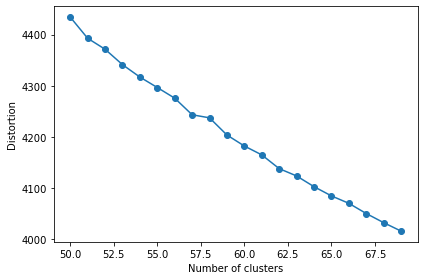

In [131]:
distortions = []
for i in range(50, 70):
    km = KMeans(n_clusters=i, random_state = 0)
    labels_km = km.fit_predict(pos2)
    distortions.append(km.inertia_)
plt.plot(range(50, 70), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('images/11_03.png', dpi=300)
plt.show()

In [89]:
from sklearn.cluster import KMeans

In [133]:
km = KMeans(n_clusters=40, random_state=0)

In [134]:
labels_km = km.fit_predict(pos2)

In [135]:
print(labels_km)

[30 39 19 ... 35 39  1]


In [142]:
result = []
for cur in range(0,40):
    temp = [i for i, e in enumerate(labels_km) if e == cur]
    result.append(temp)

In [144]:
import pickle
with open('tf-idf_Result.pkl','wb') as f:
       pickle.dump(result,f)

In [145]:
with open('tf-idf_Result.pkl','rb') as f:
       data=pickle.load(f)

In [181]:
len(data[32])

1170

In [160]:
for i,e in enumerate(tot_rev_df["store"]):
    print(i,e)

0 15
1 18
2 19
3 37
4 38
5 49
6 50
7 53
8 56
9 58
10 60
11 68
12 77
13 86
14 91
15 92
16 94
17 102
18 110
19 123
20 129
21 131
22 133
23 134
24 139
25 140
26 148
27 149
28 150
29 151
30 152
31 154
32 173
33 175
34 177
35 180
36 184
37 197
38 206
39 216
40 219
41 221
42 223
43 228
44 239
45 243
46 248
47 257
48 266
49 268
50 296
51 305
52 316
53 318
54 327
55 328
56 335
57 371
58 372
59 373
60 389
61 395
62 405
63 411
64 418
65 419
66 430
67 432
68 435
69 436
70 441
71 446
72 459
73 463
74 483
75 484
76 486
77 496
78 511
79 512
80 516
81 517
82 529
83 532
84 534
85 537
86 540
87 541
88 542
89 546
90 550
91 555
92 557
93 559
94 563
95 578
96 580
97 583
98 585
99 587
100 601
101 614
102 615
103 622
104 623
105 630
106 637
107 641
108 642
109 644
110 659
111 668
112 670
113 672
114 676
115 677
116 689
117 691
118 699
119 700
120 708
121 714
122 716
123 717
124 718
125 724
126 737
127 741
128 742
129 743
130 744
131 745
132 748
133 752
134 765
135 786
136 787
137 790
138 798
139 803
140 812

1629 16174
1630 16190
1631 16206
1632 16214
1633 16216
1634 16222
1635 16223
1636 16231
1637 16240
1638 16246
1639 16247
1640 16254
1641 16273
1642 16278
1643 16279
1644 16280
1645 16283
1646 16291
1647 16300
1648 16301
1649 16303
1650 16308
1651 16316
1652 16317
1653 16318
1654 16319
1655 16322
1656 16324
1657 16326
1658 16328
1659 16332
1660 16347
1661 16351
1662 16354
1663 16359
1664 16362
1665 16364
1666 16369
1667 16375
1668 16382
1669 16386
1670 16387
1671 16394
1672 16396
1673 16407
1674 16408
1675 16423
1676 16430
1677 16432
1678 16444
1679 16449
1680 16458
1681 16460
1682 16463
1683 16466
1684 16467
1685 16468
1686 16478
1687 16497
1688 16500
1689 16503
1690 16505
1691 16534
1692 16537
1693 16539
1694 16545
1695 16546
1696 16550
1697 16551
1698 16552
1699 16556
1700 16591
1701 16596
1702 16600
1703 16602
1704 16616
1705 16622
1706 16623
1707 16626
1708 16646
1709 16649
1710 16689
1711 16690
1712 16699
1713 16719
1714 16720
1715 16722
1716 16723
1717 16724
1718 16725
1719 16731

2379 21966
2380 21986
2381 21994
2382 22013
2383 22014
2384 22033
2385 22050
2386 22055
2387 22058
2388 22059
2389 22066
2390 22068
2391 22069
2392 22071
2393 22073
2394 22085
2395 22095
2396 22102
2397 22117
2398 22119
2399 22122
2400 22156
2401 22178
2402 22184
2403 22192
2404 22202
2405 22213
2406 22214
2407 22292
2408 22295
2409 22296
2410 22313
2411 22320
2412 22325
2413 22334
2414 22357
2415 22376
2416 22380
2417 22386
2418 22401
2419 22408
2420 22409
2421 22412
2422 22414
2423 22415
2424 22423
2425 22427
2426 22434
2427 22436
2428 22449
2429 22459
2430 22480
2431 22485
2432 22487
2433 22499
2434 22513
2435 22514
2436 22520
2437 22524
2438 22536
2439 22538
2440 22540
2441 22543
2442 22544
2443 22546
2444 22547
2445 22561
2446 22563
2447 22591
2448 22592
2449 22599
2450 22600
2451 22609
2452 22618
2453 22623
2454 22625
2455 22635
2456 22654
2457 22655
2458 22658
2459 22684
2460 22689
2461 22692
2462 22694
2463 22695
2464 22698
2465 22699
2466 22708
2467 22723
2468 22740
2469 22744

3129 27154
3130 27169
3131 27173
3132 27195
3133 27196
3134 27221
3135 27223
3136 27229
3137 27236
3138 27273
3139 27275
3140 27290
3141 27316
3142 27318
3143 27346
3144 27358
3145 27359
3146 27407
3147 27414
3148 27416
3149 27454
3150 27474
3151 27479
3152 27481
3153 27491
3154 27498
3155 27501
3156 27503
3157 27509
3158 27515
3159 27522
3160 27534
3161 27569
3162 27574
3163 27575
3164 27576
3165 27583
3166 27607
3167 27610
3168 27612
3169 27615
3170 27617
3171 27619
3172 27621
3173 27625
3174 27630
3175 27633
3176 27637
3177 27642
3178 27643
3179 27646
3180 27647
3181 27649
3182 27651
3183 27652
3184 27662
3185 27667
3186 27668
3187 27678
3188 27679
3189 27680
3190 27686
3191 27710
3192 27721
3193 27738
3194 27750
3195 27751
3196 27762
3197 27767
3198 27770
3199 27771
3200 27780
3201 27781
3202 27786
3203 27792
3204 27795
3205 27802
3206 27803
3207 27807
3208 27812
3209 27814
3210 27824
3211 27825
3212 27833
3213 27854
3214 27857
3215 27876
3216 27906
3217 27907
3218 27922
3219 27925

3878 32745
3879 32746
3880 32747
3881 32748
3882 32750
3883 32752
3884 32758
3885 32760
3886 32761
3887 32762
3888 32763
3889 32767
3890 32768
3891 32774
3892 32780
3893 32782
3894 32786
3895 32787
3896 32803
3897 32806
3898 32808
3899 32822
3900 32825
3901 32826
3902 32829
3903 32835
3904 32840
3905 32841
3906 32843
3907 32844
3908 32848
3909 32860
3910 32865
3911 32877
3912 32880
3913 32897
3914 32900
3915 32906
3916 32907
3917 32920
3918 32924
3919 32932
3920 32933
3921 32937
3922 32945
3923 32948
3924 32953
3925 32958
3926 32959
3927 32966
3928 32984
3929 32990
3930 32997
3931 33002
3932 33010
3933 33031
3934 33037
3935 33038
3936 33041
3937 33044
3938 33048
3939 33049
3940 33050
3941 33052
3942 33056
3943 33058
3944 33061
3945 33062
3946 33063
3947 33064
3948 33065
3949 33067
3950 33069
3951 33074
3952 33077
3953 33081
3954 33086
3955 33089
3956 33092
3957 33094
3958 33100
3959 33126
3960 33137
3961 33140
3962 33146
3963 33147
3964 33153
3965 33158
3966 33166
3967 33170
3968 33180

4628 38009
4629 38013
4630 38021
4631 38022
4632 38026
4633 38028
4634 38040
4635 38052
4636 38053
4637 38054
4638 38055
4639 38060
4640 38082
4641 38100
4642 38119
4643 38120
4644 38125
4645 38131
4646 38144
4647 38159
4648 38161
4649 38162
4650 38198
4651 38209
4652 38210
4653 38211
4654 38215
4655 38220
4656 38221
4657 38227
4658 38228
4659 38230
4660 38233
4661 38235
4662 38238
4663 38240
4664 38243
4665 38249
4666 38256
4667 38257
4668 38290
4669 38300
4670 38303
4671 38306
4672 38312
4673 38313
4674 38321
4675 38323
4676 38326
4677 38344
4678 38351
4679 38352
4680 38374
4681 38382
4682 38393
4683 38395
4684 38400
4685 38401
4686 38403
4687 38404
4688 38405
4689 38407
4690 38411
4691 38420
4692 38428
4693 38434
4694 38435
4695 38436
4696 38439
4697 38440
4698 38441
4699 38442
4700 38444
4701 38448
4702 38473
4703 38476
4704 38479
4705 38487
4706 38489
4707 38582
4708 38602
4709 38617
4710 38618
4711 38624
4712 38641
4713 38644
4714 38672
4715 38723
4716 38727
4717 38728
4718 38730

5878 48963
5879 48995
5880 48996
5881 49001
5882 49003
5883 49023
5884 49050
5885 49069
5886 49071
5887 49072
5888 49074
5889 49082
5890 49086
5891 49091
5892 49092
5893 49104
5894 49106
5895 49107
5896 49111
5897 49117
5898 49125
5899 49128
5900 49170
5901 49172
5902 49190
5903 49200
5904 49244
5905 49281
5906 49282
5907 49284
5908 49304
5909 49314
5910 49316
5911 49330
5912 49347
5913 49349
5914 49359
5915 49380
5916 49389
5917 49417
5918 49445
5919 49458
5920 49463
5921 49474
5922 49475
5923 49481
5924 49484
5925 49485
5926 49494
5927 49503
5928 49508
5929 49521
5930 49557
5931 49561
5932 49576
5933 49580
5934 49606
5935 49646
5936 49651
5937 49665
5938 49667
5939 49669
5940 49676
5941 49687
5942 49692
5943 49707
5944 49709
5945 49716
5946 49721
5947 49733
5948 49748
5949 49753
5950 49796
5951 49805
5952 49809
5953 49813
5954 49817
5955 49836
5956 49842
5957 49843
5958 49866
5959 49896
5960 49901
5961 49923
5962 49924
5963 49930
5964 49934
5965 49936
5966 49939
5967 49940
5968 49946

6898 59247
6899 59249
6900 59251
6901 59256
6902 59272
6903 59304
6904 59307
6905 59312
6906 59322
6907 59335
6908 59347
6909 59353
6910 59364
6911 59376
6912 59381
6913 59382
6914 59387
6915 59401
6916 59402
6917 59403
6918 59404
6919 59406
6920 59407
6921 59410
6922 59417
6923 59418
6924 59430
6925 59441
6926 59447
6927 59480
6928 59486
6929 59488
6930 59497
6931 59514
6932 59532
6933 59538
6934 59547
6935 59554
6936 59559
6937 59568
6938 59571
6939 59576
6940 59578
6941 59594
6942 59643
6943 59649
6944 59652
6945 59654
6946 59667
6947 59680
6948 59697
6949 59717
6950 59721
6951 59722
6952 59730
6953 59753
6954 59757
6955 59781
6956 59804
6957 59808
6958 59811
6959 59814
6960 59866
6961 59867
6962 59870
6963 59876
6964 59888
6965 59889
6966 59891
6967 59900
6968 59901
6969 59902
6970 59914
6971 59917
6972 59926
6973 59928
6974 59929
6975 59933
6976 59934
6977 59938
6978 59953
6979 59954
6980 59957
6981 59975
6982 60080
6983 60089
6984 60115
6985 60140
6986 60145
6987 60159
6988 60163

8127 69437
8128 69440
8129 69445
8130 69446
8131 69452
8132 69462
8133 69464
8134 69465
8135 69482
8136 69483
8137 69501
8138 69528
8139 69535
8140 69536
8141 69552
8142 69556
8143 69569
8144 69571
8145 69572
8146 69575
8147 69579
8148 69584
8149 69585
8150 69597
8151 69612
8152 69613
8153 69614
8154 69620
8155 69622
8156 69637
8157 69651
8158 69660
8159 69669
8160 69673
8161 69683
8162 69684
8163 69688
8164 69702
8165 69710
8166 69711
8167 69712
8168 69713
8169 69715
8170 69727
8171 69728
8172 69729
8173 69731
8174 69732
8175 69735
8176 69737
8177 69741
8178 69762
8179 69781
8180 69786
8181 69801
8182 69807
8183 69843
8184 69854
8185 69862
8186 69866
8187 69871
8188 69884
8189 69902
8190 69910
8191 69922
8192 69926
8193 69935
8194 69952
8195 69973
8196 70010
8197 70117
8198 70157
8199 70195
8200 70200
8201 70219
8202 70224
8203 70229
8204 70239
8205 70261
8206 70265
8207 70272
8208 70298
8209 70300
8210 70313
8211 70328
8212 70345
8213 70357
8214 70368
8215 70372
8216 70407
8217 70463

9317 79408
9318 79419
9319 79420
9320 79433
9321 79434
9322 79436
9323 79442
9324 79460
9325 79467
9326 79476
9327 79485
9328 79494
9329 79510
9330 79524
9331 79534
9332 79537
9333 79539
9334 79550
9335 79556
9336 79569
9337 79601
9338 79609
9339 79611
9340 79630
9341 79633
9342 79649
9343 79660
9344 79678
9345 79685
9346 79689
9347 79694
9348 79702
9349 79705
9350 79708
9351 79710
9352 79711
9353 79712
9354 79714
9355 79715
9356 79722
9357 79738
9358 79742
9359 79745
9360 79748
9361 79751
9362 79756
9363 79790
9364 79791
9365 79797
9366 79807
9367 79819
9368 79824
9369 79827
9370 79828
9371 79831
9372 79833
9373 79834
9374 79836
9375 79838
9376 79840
9377 79841
9378 79842
9379 79860
9380 79866
9381 79867
9382 79892
9383 79905
9384 79907
9385 79938
9386 79945
9387 79956
9388 79958
9389 79972
9390 79983
9391 79993
9392 80008
9393 80037
9394 80061
9395 80063
9396 80092
9397 80111
9398 80112
9399 80113
9400 80117
9401 80118
9402 80126
9403 80144
9404 80180
9405 80209
9406 80219
9407 80222

10741 92247
10742 92249
10743 92250
10744 92252
10745 92253
10746 92254
10747 92255
10748 92257
10749 92260
10750 92262
10751 92266
10752 92267
10753 92284
10754 92285
10755 92286
10756 92287
10757 92289
10758 92290
10759 92291
10760 92292
10761 92293
10762 92299
10763 92304
10764 92308
10765 92311
10766 92316
10767 92319
10768 92323
10769 92345
10770 92350
10771 92356
10772 92358
10773 92364
10774 92365
10775 92369
10776 92388
10777 92390
10778 92394
10779 92438
10780 92447
10781 92450
10782 92452
10783 92453
10784 92457
10785 92460
10786 92465
10787 92468
10788 92476
10789 92526
10790 92533
10791 92537
10792 92539
10793 92541
10794 92550
10795 92551
10796 92557
10797 92563
10798 92568
10799 92570
10800 92605
10801 92611
10802 92615
10803 92657
10804 92661
10805 92685
10806 92686
10807 92687
10808 92702
10809 92713
10810 92738
10811 92742
10812 92764
10813 92765
10814 92779
10815 92783
10816 92788
10817 92789
10818 92810
10819 92815
10820 92820
10821 92824
10822 92841
10823 92848
1082

11928 101024
11929 101035
11930 101065
11931 101066
11932 101082
11933 101088
11934 101092
11935 101098
11936 101108
11937 101116
11938 101123
11939 101129
11940 101131
11941 101134
11942 101137
11943 101175
11944 101178
11945 101186
11946 101207
11947 101208
11948 101210
11949 101215
11950 101217
11951 101226
11952 101253
11953 101254
11954 101257
11955 101266
11956 101313
11957 101316
11958 101321
11959 101322
11960 101323
11961 101329
11962 101330
11963 101332
11964 101338
11965 101339
11966 101346
11967 101347
11968 101349
11969 101353
11970 101354
11971 101367
11972 101368
11973 101369
11974 101373
11975 101376
11976 101394
11977 101404
11978 101405
11979 101409
11980 101419
11981 101429
11982 101448
11983 101452
11984 101458
11985 101487
11986 101488
11987 101489
11988 101509
11989 101513
11990 101522
11991 101526
11992 101550
11993 101560
11994 101561
11995 101569
11996 101593
11997 101602
11998 101613
11999 101614
12000 101642
12001 101653
12002 101655
12003 101691
12004 101706

12625 107343
12626 107345
12627 107346
12628 107347
12629 107348
12630 107349
12631 107350
12632 107351
12633 107352
12634 107353
12635 107354
12636 107355
12637 107356
12638 107357
12639 107359
12640 107361
12641 107365
12642 107368
12643 107369
12644 107370
12645 107371
12646 107379
12647 107381
12648 107382
12649 107383
12650 107384
12651 107385
12652 107390
12653 107397
12654 107400
12655 107402
12656 107404
12657 107408
12658 107409
12659 107410
12660 107413
12661 107419
12662 107422
12663 107423
12664 107425
12665 107426
12666 107431
12667 107432
12668 107433
12669 107434
12670 107435
12671 107437
12672 107438
12673 107439
12674 107440
12675 107441
12676 107442
12677 107443
12678 107446
12679 107448
12680 107451
12681 107452
12682 107469
12683 107472
12684 107476
12685 107491
12686 107501
12687 107504
12688 107507
12689 107508
12690 107511
12691 107514
12692 107522
12693 107533
12694 107539
12695 107546
12696 107557
12697 107558
12698 107568
12699 107583
12700 107613
12701 107631

13375 114693
13376 114694
13377 114695
13378 114696
13379 114697
13380 114702
13381 114732
13382 114769
13383 114778
13384 114806
13385 114921
13386 114922
13387 114923
13388 114997
13389 115020
13390 115028
13391 115035
13392 115043
13393 115047
13394 115082
13395 115092
13396 115128
13397 115136
13398 115144
13399 115145
13400 115146
13401 115154
13402 115157
13403 115158
13404 115166
13405 115181
13406 115215
13407 115223
13408 115247
13409 115248
13410 115250
13411 115286
13412 115336
13413 115339
13414 115341
13415 115342
13416 115346
13417 115380
13418 115385
13419 115388
13420 115392
13421 115393
13422 115394
13423 115399
13424 115419
13425 115432
13426 115469
13427 115484
13428 115488
13429 115500
13430 115526
13431 115532
13432 115559
13433 115561
13434 115565
13435 115576
13436 115616
13437 115619
13438 115629
13439 115631
13440 115633
13441 115634
13442 115636
13443 115638
13444 115639
13445 115652
13446 115661
13447 115667
13448 115693
13449 115694
13450 115800
13451 115830

14124 119833
14125 119834
14126 119851
14127 119857
14128 119860
14129 119874
14130 119876
14131 119877
14132 119878
14133 119879
14134 119880
14135 119881
14136 119882
14137 119891
14138 119900
14139 119904
14140 119906
14141 119907
14142 119915
14143 119921
14144 119923
14145 119925
14146 119926
14147 119927
14148 119934
14149 119953
14150 119958
14151 119959
14152 119972
14153 119977
14154 119993
14155 119998
14156 120008
14157 120014
14158 120016
14159 120028
14160 120029
14161 120030
14162 120036
14163 120043
14164 120046
14165 120057
14166 120064
14167 120065
14168 120066
14169 120067
14170 120074
14171 120077
14172 120099
14173 120105
14174 120110
14175 120125
14176 120135
14177 120139
14178 120143
14179 120146
14180 120149
14181 120154
14182 120160
14183 120169
14184 120188
14185 120190
14186 120196
14187 120197
14188 120203
14189 120212
14190 120213
14191 120215
14192 120224
14193 120225
14194 120239
14195 120240
14196 120248
14197 120257
14198 120271
14199 120273
14200 120274

14874 124650
14875 124652
14876 124653
14877 124657
14878 124661
14879 124671
14880 124673
14881 124675
14882 124677
14883 124678
14884 124690
14885 124707
14886 124710
14887 124712
14888 124713
14889 124714
14890 124719
14891 124723
14892 124726
14893 124727
14894 124735
14895 124740
14896 124764
14897 124765
14898 124768
14899 124769
14900 124770
14901 124771
14902 124773
14903 124777
14904 124780
14905 124782
14906 124786
14907 124790
14908 124791
14909 124794
14910 124813
14911 124814
14912 124815
14913 124816
14914 124819
14915 124821
14916 124822
14917 124823
14918 124827
14919 124830
14920 124831
14921 124832
14922 124836
14923 124839
14924 124841
14925 124855
14926 124857
14927 124859
14928 124860
14929 124861
14930 124862
14931 124864
14932 124882
14933 124886
14934 124888
14935 124892
14936 124896
14937 124897
14938 124902
14939 124904
14940 124914
14941 124917
14942 124919
14943 124921
14944 124924
14945 124926
14946 124929
14947 124932
14948 124933
14949 124937
14950 124941

15617 129244
15618 129247
15619 129250
15620 129257
15621 129261
15622 129263
15623 129275
15624 129276
15625 129278
15626 129292
15627 129317
15628 129318
15629 129335
15630 129337
15631 129346
15632 129347
15633 129348
15634 129349
15635 129360
15636 129361
15637 129370
15638 129383
15639 129384
15640 129385
15641 129388
15642 129397
15643 129409
15644 129425
15645 129428
15646 129431
15647 129436
15648 129461
15649 129467
15650 129475
15651 129477
15652 129479
15653 129483
15654 129489
15655 129490
15656 129493
15657 129501
15658 129502
15659 129503
15660 129504
15661 129508
15662 129537
15663 129539
15664 129545
15665 129571
15666 129579
15667 129585
15668 129590
15669 129591
15670 129594
15671 129600
15672 129602
15673 129603
15674 129609
15675 129616
15676 129620
15677 129621
15678 129624
15679 129638
15680 129653
15681 129657
15682 129659
15683 129667
15684 129673
15685 129677
15686 129682
15687 129686
15688 129695
15689 129697
15690 129703
15691 129709
15692 129718
15693 129724

16378 134955
16379 134956
16380 134962
16381 134967
16382 134972
16383 134978
16384 134979
16385 134984
16386 134985
16387 134987
16388 134994
16389 135003
16390 135006
16391 135014
16392 135015
16393 135017
16394 135019
16395 135020
16396 135022
16397 135024
16398 135029
16399 135036
16400 135037
16401 135044
16402 135045
16403 135049
16404 135057
16405 135062
16406 135066
16407 135067
16408 135070
16409 135073
16410 135075
16411 135078
16412 135081
16413 135107
16414 135111
16415 135113
16416 135114
16417 135116
16418 135121
16419 135143
16420 135144
16421 135148
16422 135156
16423 135164
16424 135166
16425 135178
16426 135180
16427 135181
16428 135183
16429 135186
16430 135205
16431 135207
16432 135209
16433 135231
16434 135272
16435 135273
16436 135284
16437 135285
16438 135295
16439 135296
16440 135297
16441 135298
16442 135299
16443 135300
16444 135301
16445 135304
16446 135305
16447 135306
16448 135324
16449 135328
16450 135336
16451 135361
16452 135397
16453 135402
16454 135407

17083 140761
17084 140770
17085 140775
17086 140783
17087 140784
17088 140787
17089 140788
17090 140799
17091 140812
17092 140817
17093 140818
17094 140820
17095 140824
17096 140825
17097 140829
17098 140832
17099 140833
17100 140834
17101 140846
17102 140861
17103 140865
17104 140867
17105 140885
17106 140886
17107 140889
17108 140913
17109 140914
17110 140923
17111 140935
17112 140956
17113 140968
17114 140977
17115 140978
17116 141007
17117 141042
17118 141054
17119 141055
17120 141076
17121 141086
17122 141088
17123 141093
17124 141112
17125 141123
17126 141135
17127 141140
17128 141150
17129 141151
17130 141169
17131 141212
17132 141215
17133 141220
17134 141236
17135 141260
17136 141275
17137 141276
17138 141308
17139 141309
17140 141310
17141 141315
17142 141337
17143 141340
17144 141366
17145 141368
17146 141373
17147 141375
17148 141376
17149 141394
17150 141403
17151 141447
17152 141472
17153 141477
17154 141487
17155 141504
17156 141507
17157 141533
17158 141534
17159 141541

17800 146106
17801 146107
17802 146110
17803 146113
17804 146114
17805 146117
17806 146120
17807 146121
17808 146123
17809 146131
17810 146135
17811 146138
17812 146150
17813 146159
17814 146176
17815 146187
17816 146190
17817 146195
17818 146196
17819 146211
17820 146212
17821 146214
17822 146217
17823 146225
17824 146229
17825 146230
17826 146244
17827 146246
17828 146247
17829 146250
17830 146257
17831 146264
17832 146273
17833 146275
17834 146276
17835 146279
17836 146282
17837 146285
17838 146289
17839 146291
17840 146296
17841 146300
17842 146307
17843 146308
17844 146309
17845 146310
17846 146311
17847 146312
17848 146313
17849 146314
17850 146315
17851 146316
17852 146318
17853 146319
17854 146320
17855 146321
17856 146322
17857 146323
17858 146324
17859 146325
17860 146326
17861 146327
17862 146328
17863 146330
17864 146331
17865 146332
17866 146333
17867 146335
17868 146336
17869 146337
17870 146338
17871 146339
17872 146342
17873 146345
17874 146354
17875 146364
17876 146366

19140 156095
19141 156098
19142 156099
19143 156103
19144 156110
19145 156113
19146 156114
19147 156118
19148 156121
19149 156135
19150 156144
19151 156150
19152 156171
19153 156179
19154 156181
19155 156190
19156 156196
19157 156202
19158 156213
19159 156225
19160 156236
19161 156240
19162 156248
19163 156259
19164 156267
19165 156270
19166 156317
19167 156331
19168 156350
19169 156374
19170 156384
19171 156385
19172 156396
19173 156399
19174 156400
19175 156402
19176 156404
19177 156407
19178 156419
19179 156480
19180 156488
19181 156490
19182 156497
19183 156510
19184 156526
19185 156531
19186 156536
19187 156537
19188 156549
19189 156555
19190 156557
19191 156560
19192 156563
19193 156565
19194 156569
19195 156588
19196 156592
19197 156594
19198 156595
19199 156604
19200 156618
19201 156620
19202 156629
19203 156630
19204 156634
19205 156636
19206 156638
19207 156650
19208 156658
19209 156667
19210 156672
19211 156679
19212 156686
19213 156688
19214 156690
19215 156691
19216 156696

19850 161482
19851 161497
19852 161499
19853 161506
19854 161511
19855 161550
19856 161558
19857 161560
19858 161577
19859 161589
19860 161598
19861 161599
19862 161600
19863 161602
19864 161603
19865 161606
19866 161611
19867 161646
19868 161658
19869 161660
19870 161666
19871 161667
19872 161668
19873 161686
19874 161706
19875 161710
19876 161714
19877 161788
19878 161795
19879 161796
19880 161812
19881 161824
19882 161825
19883 161827
19884 161828
19885 161847
19886 161851
19887 161865
19888 161867
19889 161868
19890 161870
19891 161875
19892 161880
19893 161889
19894 161909
19895 161917
19896 161943
19897 161962
19898 161963
19899 162014
19900 162018
19901 162022
19902 162032
19903 162043
19904 162045
19905 162046
19906 162047
19907 162051
19908 162054
19909 162064
19910 162065
19911 162066
19912 162067
19913 162091
19914 162094
19915 162138
19916 162144
19917 162145
19918 162151
19919 162161
19920 162164
19921 162171
19922 162172
19923 162175
19924 162188
19925 162192
19926 162195

20622 167322
20623 167325
20624 167333
20625 167334
20626 167346
20627 167357
20628 167379
20629 167381
20630 167382
20631 167384
20632 167399
20633 167403
20634 167404
20635 167405
20636 167407
20637 167418
20638 167422
20639 167427
20640 167437
20641 167447
20642 167450
20643 167451
20644 167453
20645 167454
20646 167458
20647 167460
20648 167465
20649 167507
20650 167509
20651 167524
20652 167529
20653 167547
20654 167553
20655 167557
20656 167558
20657 167569
20658 167588
20659 167593
20660 167610
20661 167612
20662 167623
20663 167627
20664 167630
20665 167631
20666 167634
20667 167644
20668 167648
20669 167649
20670 167651
20671 167671
20672 167684
20673 167686
20674 167688
20675 167690
20676 167695
20677 167699
20678 167700
20679 167712
20680 167718
20681 167723
20682 167754
20683 167757
20684 167774
20685 167792
20686 167803
20687 167804
20688 167826
20689 167828
20690 167841
20691 167844
20692 167845
20693 167857
20694 167862
20695 167863
20696 167884
20697 167885
20698 167886

21372 173426
21373 173433
21374 173435
21375 173445
21376 173449
21377 173453
21378 173463
21379 173464
21380 173483
21381 173490
21382 173502
21383 173512
21384 173514
21385 173516
21386 173524
21387 173527
21388 173532
21389 173535
21390 173537
21391 173540
21392 173541
21393 173546
21394 173548
21395 173549
21396 173552
21397 173556
21398 173559
21399 173560
21400 173573
21401 173574
21402 173599
21403 173612
21404 173623
21405 173627
21406 173655
21407 173658
21408 173659
21409 173661
21410 173663
21411 173666
21412 173667
21413 173668
21414 173673
21415 173674
21416 173688
21417 173694
21418 173699
21419 173709
21420 173724
21421 173737
21422 173743
21423 173751
21424 173754
21425 173757
21426 173761
21427 173774
21428 173784
21429 173795
21430 173802
21431 173806
21432 173810
21433 173825
21434 173826
21435 173829
21436 173832
21437 173853
21438 173871
21439 173879
21440 173885
21441 173886
21442 173888
21443 173914
21444 173924
21445 173929
21446 173930
21447 173936
21448 173940

22122 178162
22123 178163
22124 178170
22125 178208
22126 178220
22127 178222
22128 178226
22129 178228
22130 178230
22131 178231
22132 178243
22133 178260
22134 178266
22135 178274
22136 178283
22137 178295
22138 178300
22139 178305
22140 178307
22141 178318
22142 178323
22143 178324
22144 178326
22145 178343
22146 178345
22147 178346
22148 178357
22149 178363
22150 178364
22151 178366
22152 178390
22153 178407
22154 178416
22155 178422
22156 178424
22157 178446
22158 178448
22159 178452
22160 178454
22161 178485
22162 178486
22163 178492
22164 178499
22165 178501
22166 178504
22167 178581
22168 178625
22169 178666
22170 178674
22171 178700
22172 178703
22173 178707
22174 178719
22175 178721
22176 178725
22177 178731
22178 178734
22179 178735
22180 178766
22181 178767
22182 178769
22183 178843
22184 178850
22185 178896
22186 178901
22187 178912
22188 178923
22189 178926
22190 178929
22191 178930
22192 178940
22193 178941
22194 178944
22195 178954
22196 178965
22197 178986
22198 179051

22871 185888
22872 185901
22873 185903
22874 185918
22875 185926
22876 185936
22877 185941
22878 186009
22879 186046
22880 186071
22881 186081
22882 186092
22883 186093
22884 186144
22885 186147
22886 186148
22887 186161
22888 186164
22889 186165
22890 186167
22891 186169
22892 186172
22893 186173
22894 186175
22895 186176
22896 186181
22897 186182
22898 186183
22899 186187
22900 186190
22901 186191
22902 186192
22903 186194
22904 186206
22905 186207
22906 186209
22907 186215
22908 186216
22909 186217
22910 186233
22911 186241
22912 186244
22913 186248
22914 186249
22915 186251
22916 186252
22917 186267
22918 186271
22919 186281
22920 186282
22921 186286
22922 186288
22923 186294
22924 186295
22925 186298
22926 186301
22927 186315
22928 186332
22929 186344
22930 186345
22931 186357
22932 186361
22933 186408
22934 186411
22935 186418
22936 186438
22937 186440
22938 186441
22939 186446
22940 186452
22941 186453
22942 186456
22943 186461
22944 186466
22945 186469
22946 186488
22947 186491

23637 191597
23638 191599
23639 191601
23640 191602
23641 191622
23642 191631
23643 191638
23644 191641
23645 191649
23646 191651
23647 191653
23648 191655
23649 191659
23650 191661
23651 191666
23652 191667
23653 191670
23654 191673
23655 191674
23656 191677
23657 191687
23658 191689
23659 191694
23660 191695
23661 191709
23662 191711
23663 191712
23664 191734
23665 191736
23666 191738
23667 191741
23668 191743
23669 191753
23670 191762
23671 191784
23672 191796
23673 191797
23674 191806
23675 191807
23676 191813
23677 191817
23678 191823
23679 191827
23680 191830
23681 191842
23682 191848
23683 191849
23684 191850
23685 191856
23686 191868
23687 191869
23688 191896
23689 191901
23690 191903
23691 191916
23692 191922
23693 191928
23694 191942
23695 191945
23696 191947
23697 191962
23698 191968
23699 191980
23700 191992
23701 191993
23702 191994
23703 192003
23704 192007
23705 192014
23706 192016
23707 192020
23708 192025
23709 192026
23710 192031
23711 192036
23712 192037
23713 192038

24573 198408
24574 198410
24575 198415
24576 198422
24577 198432
24578 198433
24579 198439
24580 198452
24581 198453
24582 198454
24583 198455
24584 198456
24585 198459
24586 198474
24587 198483
24588 198487
24589 198492
24590 198493
24591 198494
24592 198497
24593 198530
24594 198531
24595 198554
24596 198556
24597 198560
24598 198565
24599 198579
24600 198594
24601 198597
24602 198605
24603 198622
24604 198637
24605 198647
24606 198651
24607 198653
24608 198657
24609 198671
24610 198675
24611 198679
24612 198690
24613 198706
24614 198707
24615 198716
24616 198725
24617 198726
24618 198728
24619 198737
24620 198762
24621 198772
24622 198776
24623 198777
24624 198781
24625 198782
24626 198783
24627 198784
24628 198785
24629 198786
24630 198792
24631 198809
24632 198846
24633 198855
24634 198867
24635 198878
24636 198886
24637 198903
24638 198922
24639 198938
24640 198943
24641 198956
24642 198957
24643 198968
24644 198971
24645 198972
24646 198978
24647 198992
24648 198997
24649 198999

25371 204464
25372 204466
25373 204474
25374 204475
25375 204477
25376 204478
25377 204482
25378 204485
25379 204487
25380 204495
25381 204498
25382 204499
25383 204509
25384 204511
25385 204520
25386 204525
25387 204527
25388 204549
25389 204550
25390 204566
25391 204568
25392 204571
25393 204595
25394 204602
25395 204603
25396 204607
25397 204608
25398 204610
25399 204621
25400 204633
25401 204637
25402 204640
25403 204643
25404 204644
25405 204646
25406 204649
25407 204650
25408 204652
25409 204656
25410 204663
25411 204666
25412 204671
25413 204672
25414 204673
25415 204675
25416 204680
25417 204686
25418 204687
25419 204689
25420 204691
25421 204693
25422 204698
25423 204699
25424 204701
25425 204704
25426 204714
25427 204723
25428 204724
25429 204725
25430 204726
25431 204728
25432 204729
25433 204730
25434 204731
25435 204732
25436 204733
25437 204735
25438 204740
25439 204741
25440 204744
25441 204752
25442 204770
25443 204779
25444 204787
25445 204791
25446 204804
25447 204812

26216 211229
26217 211259
26218 211263
26219 211270
26220 211271
26221 211273
26222 211275
26223 211288
26224 211290
26225 211292
26226 211298
26227 211301
26228 211319
26229 211322
26230 211328
26231 211336
26232 211341
26233 211358
26234 211360
26235 211361
26236 211367
26237 211373
26238 211378
26239 211394
26240 211395
26241 211396
26242 211417
26243 211439
26244 211500
26245 211502
26246 211526
26247 211528
26248 211530
26249 211532
26250 211533
26251 211534
26252 211535
26253 211536
26254 211550
26255 211551
26256 211553
26257 211565
26258 211566
26259 211569
26260 211589
26261 211597
26262 211601
26263 211606
26264 211607
26265 211611
26266 211625
26267 211626
26268 211630
26269 211652
26270 211653
26271 211656
26272 211669
26273 211682
26274 211683
26275 211685
26276 211686
26277 211688
26278 211689
26279 211693
26280 211707
26281 211708
26282 211727
26283 211728
26284 211740
26285 211759
26286 211761
26287 211767
26288 211769
26289 211779
26290 211781
26291 211795
26292 211801

26870 216186
26871 216189
26872 216198
26873 216203
26874 216213
26875 216217
26876 216219
26877 216223
26878 216248
26879 216256
26880 216261
26881 216263
26882 216266
26883 216270
26884 216272
26885 216277
26886 216280
26887 216284
26888 216285
26889 216288
26890 216290
26891 216292
26892 216300
26893 216306
26894 216310
26895 216312
26896 216313
26897 216314
26898 216315
26899 216316
26900 216318
26901 216319
26902 216323
26903 216328
26904 216329
26905 216330
26906 216331
26907 216337
26908 216338
26909 216339
26910 216340
26911 216341
26912 216355
26913 216359
26914 216366
26915 216371
26916 216383
26917 216408
26918 216420
26919 216428
26920 216434
26921 216442
26922 216451
26923 216453
26924 216454
26925 216461
26926 216468
26927 216469
26928 216477
26929 216479
26930 216498
26931 216507
26932 216514
26933 216515
26934 216539
26935 216555
26936 216558
26937 216588
26938 216591
26939 216597
26940 216598
26941 216599
26942 216600
26943 216601
26944 216602
26945 216603
26946 216604

27649 221677
27650 221683
27651 221685
27652 221690
27653 221704
27654 221705
27655 221731
27656 221735
27657 221739
27658 221742
27659 221743
27660 221754
27661 221755
27662 221758
27663 221759
27664 221762
27665 221763
27666 221777
27667 221789
27668 221812
27669 221813
27670 221814
27671 221816
27672 221817
27673 221818
27674 221820
27675 221821
27676 221827
27677 221828
27678 221829
27679 221832
27680 221833
27681 221834
27682 221837
27683 221839
27684 221861
27685 221865
27686 221873
27687 221877
27688 221883
27689 221885
27690 221901
27691 221933
27692 221936
27693 221946
27694 221957
27695 221959
27696 221960
27697 221961
27698 221963
27699 221965
27700 221969
27701 221973
27702 221980
27703 221982
27704 221984
27705 221988
27706 221990
27707 221991
27708 221992
27709 221996
27710 222002
27711 222004
27712 222005
27713 222007
27714 222008
27715 222012
27716 222013
27717 222014
27718 222019
27719 222024
27720 222027
27721 222042
27722 222043
27723 222046
27724 222047
27725 222054

28370 226929
28371 226935
28372 226949
28373 226951
28374 226957
28375 226961
28376 226962
28377 226967
28378 226977
28379 227002
28380 227015
28381 227025
28382 227029
28383 227049
28384 227054
28385 227055
28386 227064
28387 227086
28388 227091
28389 227097
28390 227105
28391 227122
28392 227123
28393 227128
28394 227141
28395 227144
28396 227145
28397 227149
28398 227161
28399 227169
28400 227172
28401 227173
28402 227183
28403 227185
28404 227187
28405 227191
28406 227199
28407 227205
28408 227209
28409 227213
28410 227215
28411 227221
28412 227222
28413 227234
28414 227239
28415 227242
28416 227258
28417 227263
28418 227273
28419 227324
28420 227352
28421 227353
28422 227355
28423 227367
28424 227373
28425 227378
28426 227396
28427 227417
28428 227421
28429 227470
28430 227471
28431 227473
28432 227475
28433 227491
28434 227509
28435 227541
28436 227544
28437 227562
28438 227565
28439 227568
28440 227612
28441 227615
28442 227618
28443 227619
28444 227634
28445 227650
28446 227659

29119 232974
29120 232977
29121 232978
29122 232979
29123 232980
29124 232981
29125 232982
29126 232983
29127 232984
29128 232985
29129 232987
29130 232988
29131 232989
29132 232993
29133 232994
29134 232995
29135 232997
29136 233009
29137 233030
29138 233031
29139 233034
29140 233046
29141 233049
29142 233050
29143 233070
29144 233075
29145 233079
29146 233080
29147 233081
29148 233095
29149 233098
29150 233111
29151 233118
29152 233127
29153 233128
29154 233131
29155 233134
29156 233135
29157 233141
29158 233147
29159 233150
29160 233152
29161 233153
29162 233159
29163 233172
29164 233192
29165 233214
29166 233216
29167 233223
29168 233225
29169 233237
29170 233243
29171 233249
29172 233250
29173 233277
29174 233297
29175 233304
29176 233315
29177 233317
29178 233334
29179 233340
29180 233355
29181 233356
29182 233359
29183 233373
29184 233378
29185 233401
29186 233402
29187 233403
29188 233404
29189 233410
29190 233411
29191 233413
29192 233433
29193 233437
29194 233444
29195 233448

29869 239017
29870 239018
29871 239021
29872 239026
29873 239028
29874 239029
29875 239030
29876 239033
29877 239051
29878 239062
29879 239070
29880 239072
29881 239075
29882 239078
29883 239079
29884 239095
29885 239100
29886 239115
29887 239121
29888 239183
29889 239184
29890 239185
29891 239200
29892 239236
29893 239250
29894 239264
29895 239268
29896 239281
29897 239287
29898 239289
29899 239290
29900 239291
29901 239300
29902 239315
29903 239316
29904 239318
29905 239352
29906 239388
29907 239404
29908 239430
29909 239439
29910 239442
29911 239443
29912 239444
29913 239501
29914 239505
29915 239523
29916 239532
29917 239537
29918 239547
29919 239552
29920 239554
29921 239557
29922 239572
29923 239573
29924 239578
29925 239588
29926 239600
29927 239601
29928 239603
29929 239608
29930 239609
29931 239622
29932 239632
29933 239639
29934 239640
29935 239641
29936 239642
29937 239643
29938 239644
29939 239655
29940 239658
29941 239662
29942 239666
29943 239668
29944 239669
29945 239670

30659 242911
30660 242913
30661 242914
30662 242927
30663 242930
30664 242932
30665 242952
30666 242961
30667 242977
30668 242979
30669 242983
30670 242986
30671 242990
30672 242993
30673 242994
30674 242998
30675 243017
30676 243033
30677 243068
30678 243071
30679 243089
30680 243090
30681 243091
30682 243092
30683 243093
30684 243106
30685 243108
30686 243109
30687 243110
30688 243112
30689 243113
30690 243116
30691 243117
30692 243135
30693 243146
30694 243164
30695 243165
30696 243168
30697 243173
30698 243174
30699 243175
30700 243178
30701 243179
30702 243180
30703 243181
30704 243182
30705 243185
30706 243186
30707 243190
30708 243200
30709 243209
30710 243215
30711 243226
30712 243228
30713 243230
30714 243231
30715 243235
30716 243239
30717 243240
30718 243243
30719 243246
30720 243253
30721 243265
30722 243276
30723 243289
30724 243290
30725 243293
30726 243295
30727 243312
30728 243313
30729 243326
30730 243327
30731 243335
30732 243336
30733 243338
30734 243340
30735 243344

31540 247494
31541 247504
31542 247515
31543 247522
31544 247529
31545 247541
31546 247551
31547 247562
31548 247564
31549 247572
31550 247577
31551 247596
31552 247598
31553 247599
31554 247609
31555 247618
31556 247625
31557 247627
31558 247646
31559 247654
31560 247678
31561 247685
31562 247688
31563 247696
31564 247697
31565 247711
31566 247737
31567 247740
31568 247747
31569 247751
31570 247754
31571 247770
31572 247790
31573 247797
31574 247817
31575 247824
31576 247845
31577 247847
31578 247850
31579 247860
31580 247907
31581 247912
31582 247916
31583 247923
31584 247924
31585 247928
31586 247940
31587 247943
31588 247944
31589 247945
31590 247954
31591 247958
31592 247964
31593 247967
31594 247972
31595 247975
31596 247976
31597 247978
31598 247994
31599 247997
31600 247998
31601 248001
31602 248014
31603 248019
31604 248021
31605 248024
31606 248048
31607 248059
31608 248060
31609 248075
31610 248084
31611 248086
31612 248091
31613 248092
31614 248100
31615 248107
31616 248130

32239 252941
32240 252967
32241 252977
32242 253006
32243 253024
32244 253028
32245 253029
32246 253049
32247 253054
32248 253058
32249 253059
32250 253070
32251 253073
32252 253080
32253 253081
32254 253085
32255 253087
32256 253115
32257 253131
32258 253135
32259 253139
32260 253141
32261 253148
32262 253150
32263 253156
32264 253158
32265 253178
32266 253181
32267 253187
32268 253194
32269 253200
32270 253204
32271 253224
32272 253227
32273 253231
32274 253239
32275 253241
32276 253243
32277 253252
32278 253255
32279 253256
32280 253257
32281 253260
32282 253261
32283 253265
32284 253281
32285 253283
32286 253295
32287 253323
32288 253330
32289 253331
32290 253383
32291 253389
32292 253391
32293 253394
32294 253402
32295 253425
32296 253436
32297 253450
32298 253451
32299 253485
32300 253506
32301 253584
32302 253588
32303 253589
32304 253615
32305 253644
32306 253665
32307 253713
32308 253740
32309 253766
32310 253771
32311 253776
32312 253779
32313 253793
32314 253800
32315 253802

33118 260493
33119 260496
33120 260511
33121 260512
33122 260515
33123 260516
33124 260518
33125 260523
33126 260529
33127 260533
33128 260534
33129 260538
33130 260539
33131 260544
33132 260546
33133 260548
33134 260550
33135 260553
33136 260556
33137 260564
33138 260583
33139 260584
33140 260585
33141 260586
33142 260587
33143 260588
33144 260589
33145 260590
33146 260600
33147 260603
33148 260606
33149 260607
33150 260610
33151 260619
33152 260630
33153 260678
33154 260695
33155 260714
33156 260723
33157 260724
33158 260728
33159 260730
33160 260734
33161 260744
33162 260749
33163 260760
33164 260765
33165 260779
33166 260780
33167 260782
33168 260784
33169 260785
33170 260793
33171 260808
33172 260836
33173 260852
33174 260856
33175 260862
33176 260881
33177 260912
33178 260913
33179 260922
33180 260951
33181 260960
33182 260989
33183 260991
33184 260999
33185 261003
33186 261018
33187 261023
33188 261024
33189 261037
33190 261052
33191 261063
33192 261065
33193 261066
33194 261082

33884 265467
33885 265474
33886 265488
33887 265508
33888 265523
33889 265524
33890 265551
33891 265554
33892 265571
33893 265582
33894 265586
33895 265591
33896 265598
33897 265605
33898 265623
33899 265624
33900 265625
33901 265626
33902 265628
33903 265645
33904 265653
33905 265655
33906 265700
33907 265709
33908 265710
33909 265717
33910 265722
33911 265727
33912 265737
33913 265740
33914 265755
33915 265768
33916 265771
33917 265779
33918 265796
33919 265806
33920 265809
33921 265825
33922 265842
33923 265856
33924 265858
33925 265860
33926 265867
33927 265870
33928 265871
33929 265877
33930 265892
33931 265898
33932 265903
33933 265905
33934 265908
33935 265919
33936 265922
33937 265923
33938 265924
33939 265928
33940 265931
33941 265940
33942 265944
33943 265948
33944 265953
33945 265955
33946 265956
33947 265957
33948 265958
33949 265969
33950 265972
33951 265977
33952 265981
33953 265982
33954 265984
33955 265985
33956 265987
33957 265988
33958 265989
33959 265993
33960 265996

34614 271227
34615 271234
34616 271239
34617 271247
34618 271261
34619 271262
34620 271268
34621 271269
34622 271270
34623 271272
34624 271274
34625 271276
34626 271282
34627 271287
34628 271290
34629 271293
34630 271294
34631 271295
34632 271306
34633 271370
34634 271373
34635 271375
34636 271376
34637 271395
34638 271400
34639 271401
34640 271410
34641 271416
34642 271417
34643 271440
34644 271455
34645 271462
34646 271492
34647 271500
34648 271504
34649 271505
34650 271516
34651 271525
34652 271559
34653 271570
34654 271572
34655 271589
34656 271641
34657 271655
34658 271658
34659 271662
34660 271663
34661 271664
34662 271665
34663 271670
34664 271678
34665 271681
34666 271702
34667 271703
34668 271707
34669 271713
34670 271722
34671 271744
34672 271747
34673 271757
34674 271762
34675 271763
34676 271771
34677 271772
34678 271776
34679 271779
34680 271783
34681 271787
34682 271789
34683 271793
34684 271808
34685 271820
34686 271824
34687 271826
34688 271827
34689 271828
34690 271832

35280 276157
35281 276160
35282 276165
35283 276166
35284 276173
35285 276191
35286 276193
35287 276194
35288 276195
35289 276197
35290 276199
35291 276205
35292 276206
35293 276208
35294 276212
35295 276216
35296 276220
35297 276222
35298 276227
35299 276233
35300 276234
35301 276236
35302 276237
35303 276238
35304 276244
35305 276246
35306 276254
35307 276257
35308 276258
35309 276259
35310 276263
35311 276265
35312 276267
35313 276270
35314 276277
35315 276278
35316 276280
35317 276285
35318 276291
35319 276298
35320 276299
35321 276312
35322 276313
35323 276314
35324 276316
35325 276320
35326 276321
35327 276323
35328 276324
35329 276328
35330 276332
35331 276343
35332 276368
35333 276372
35334 276373
35335 276374
35336 276383
35337 276385
35338 276388
35339 276389
35340 276391
35341 276392
35342 276395
35343 276396
35344 276397
35345 276399
35346 276402
35347 276403
35348 276404
35349 276405
35350 276407
35351 276408
35352 276409
35353 276410
35354 276411
35355 276412
35356 276413

36025 280907
36026 280909
36027 280911
36028 280912
36029 280913
36030 280914
36031 280915
36032 280917
36033 280919
36034 280920
36035 280921
36036 280922
36037 280923
36038 280924
36039 280925
36040 280926
36041 280927
36042 280928
36043 280929
36044 280930
36045 280931
36046 280932
36047 280934
36048 280935
36049 280937
36050 280938
36051 280939
36052 280940
36053 280941
36054 280942
36055 280943
36056 280945
36057 280948
36058 280960
36059 280964
36060 280974
36061 280978
36062 280979
36063 280983
36064 280989
36065 280994
36066 280996
36067 281002
36068 281007
36069 281008
36070 281009
36071 281010
36072 281016
36073 281018
36074 281024
36075 281025
36076 281028
36077 281032
36078 281035
36079 281036
36080 281037
36081 281038
36082 281039
36083 281040
36084 281041
36085 281060
36086 281061
36087 281066
36088 281069
36089 281072
36090 281079
36091 281083
36092 281087
36093 281095
36094 281098
36095 281102
36096 281109
36097 281110
36098 281112
36099 281113
36100 281116
36101 281119

36867 288506
36868 288507
36869 288508
36870 288510
36871 288512
36872 288514
36873 288521
36874 288528
36875 288538
36876 288541
36877 288543
36878 288547
36879 288549
36880 288550
36881 288571
36882 288591
36883 288592
36884 288636
36885 288639
36886 288645
36887 288647
36888 288649
36889 288656
36890 288659
36891 288660
36892 288661
36893 288662
36894 288667
36895 288668
36896 288694
36897 288714
36898 288749
36899 288750
36900 288757
36901 288758
36902 288807
36903 288809
36904 288836
36905 288844
36906 288845
36907 288864
36908 288880
36909 288907
36910 288911
36911 288914
36912 288917
36913 288919
36914 288923
36915 288935
36916 288943
36917 288945
36918 288950
36919 288951
36920 288967
36921 288973
36922 288974
36923 288975
36924 288976
36925 288977
36926 288981
36927 288990
36928 288992
36929 288998
36930 289000
36931 289007
36932 289009
36933 289010
36934 289011
36935 289012
36936 289016
36937 289017
36938 289028
36939 289029
36940 289033
36941 289035
36942 289041
36943 289042

37617 294685
37618 294689
37619 294691
37620 294693
37621 294694
37622 294701
37623 294702
37624 294706
37625 294707
37626 294708
37627 294709
37628 294714
37629 294725
37630 294726
37631 294727
37632 294728
37633 294732
37634 294736
37635 294738
37636 294754
37637 294766
37638 294767
37639 294768
37640 294770
37641 294773
37642 294789
37643 294790
37644 294792
37645 294795
37646 294796
37647 294807
37648 294816
37649 294819
37650 294831
37651 294833
37652 294835
37653 294849
37654 294857
37655 294867
37656 294869
37657 294871
37658 294873
37659 294877
37660 294878
37661 294881
37662 294888
37663 294907
37664 294915
37665 294924
37666 294930
37667 294942
37668 294957
37669 294962
37670 294965
37671 294967
37672 294975
37673 294984
37674 294994
37675 294997
37676 295016
37677 295023
37678 295028
37679 295039
37680 295046
37681 295049
37682 295053
37683 295070
37684 295072
37685 295076
37686 295088
37687 295090
37688 295091
37689 295112
37690 295125
37691 295130
37692 295136
37693 295169

38366 299968
38367 299972
38368 299974
38369 299975
38370 299977
38371 299983
38372 299984
38373 299985
38374 299986
38375 299991
38376 299995
38377 299998
38378 300003
38379 300007
38380 300011
38381 300028
38382 300058
38383 300066
38384 300067
38385 300068
38386 300072
38387 300091
38388 300100
38389 300106
38390 300112
38391 300124
38392 300128
38393 300135
38394 300136
38395 300149
38396 300179
38397 300180
38398 300206
38399 300224
38400 300231
38401 300232
38402 300234
38403 300244
38404 300247
38405 300248
38406 300250
38407 300253
38408 300255
38409 300260
38410 300298
38411 300315
38412 300320
38413 300321
38414 300329
38415 300338
38416 300343
38417 300354
38418 300356
38419 300358
38420 300361
38421 300370
38422 300371
38423 300384
38424 300391
38425 300393
38426 300401
38427 300403
38428 300410
38429 300418
38430 300420
38431 300423
38432 300426
38433 300427
38434 300428
38435 300441
38436 300442
38437 300444
38438 300480
38439 300483
38440 300493
38441 300515
38442 300520

39196 307942
39197 307943
39198 307944
39199 307946
39200 307947
39201 307973
39202 307979
39203 307983
39204 307987
39205 307988
39206 307993
39207 307994
39208 307995
39209 307999
39210 308012
39211 308025
39212 308028
39213 308033
39214 308034
39215 308038
39216 308053
39217 308054
39218 308055
39219 308058
39220 308062
39221 308085
39222 308092
39223 308104
39224 308107
39225 308110
39226 308111
39227 308133
39228 308145
39229 308149
39230 308150
39231 308152
39232 308153
39233 308167
39234 308172
39235 308184
39236 308187
39237 308216
39238 308221
39239 308226
39240 308228
39241 308231
39242 308232
39243 308233
39244 308234
39245 308236
39246 308246
39247 308253
39248 308254
39249 308288
39250 308302
39251 308308
39252 308311
39253 308315
39254 308318
39255 308319
39256 308321
39257 308324
39258 308343
39259 308345
39260 308346
39261 308356
39262 308361
39263 308366
39264 308377
39265 308391
39266 308393
39267 308394
39268 308397
39269 308407
39270 308423
39271 308424
39272 308425

39866 313145
39867 313148
39868 313169
39869 313179
39870 313180
39871 313186
39872 313187
39873 313189
39874 313190
39875 313203
39876 313204
39877 313217
39878 313221
39879 313230
39880 313234
39881 313262
39882 313267
39883 313268
39884 313271
39885 313295
39886 313297
39887 313303
39888 313320
39889 313334
39890 313335
39891 313342
39892 313353
39893 313361
39894 313362
39895 313366
39896 313369
39897 313388
39898 313395
39899 313396
39900 313407
39901 313409
39902 313421
39903 313432
39904 313440
39905 313468
39906 313479
39907 313490
39908 313491
39909 313497
39910 313499
39911 313506
39912 313513
39913 313528
39914 313556
39915 313576
39916 313588
39917 313592
39918 313643
39919 313649
39920 313680
39921 313681
39922 313710
39923 313719
39924 313724
39925 313727
39926 313731
39927 313746
39928 313749
39929 313751
39930 313753
39931 313760
39932 313769
39933 313771
39934 313774
39935 313805
39936 313809
39937 313816
39938 313817
39939 313820
39940 313821
39941 313823
39942 313833

40582 318616
40583 318617
40584 318625
40585 318628
40586 318629
40587 318631
40588 318633
40589 318636
40590 318639
40591 318641
40592 318642
40593 318652
40594 318654
40595 318662
40596 318664
40597 318665
40598 318673
40599 318676
40600 318677
40601 318690
40602 318692
40603 318701
40604 318703
40605 318710
40606 318713
40607 318719
40608 318721
40609 318722
40610 318725
40611 318732
40612 318733
40613 318735
40614 318745
40615 318749
40616 318752
40617 318754
40618 318756
40619 318757
40620 318760
40621 318761
40622 318764
40623 318768
40624 318769
40625 318770
40626 318772
40627 318773
40628 318775
40629 318777
40630 318780
40631 318781
40632 318782
40633 318783
40634 318786
40635 318787
40636 318790
40637 318792
40638 318793
40639 318794
40640 318802
40641 318826
40642 318832
40643 318842
40644 318849
40645 318861
40646 318883
40647 318887
40648 318935
40649 318938
40650 318939
40651 318950
40652 318953
40653 318955
40654 318956
40655 318958
40656 318959
40657 318960
40658 318961

41841 328271
41842 328277
41843 328283
41844 328337
41845 328343
41846 328348
41847 328354
41848 328360
41849 328363
41850 328380
41851 328384
41852 328388
41853 328390
41854 328393
41855 328394
41856 328396
41857 328405
41858 328408
41859 328414
41860 328422
41861 328427
41862 328428
41863 328437
41864 328448
41865 328449
41866 328459
41867 328461
41868 328464
41869 328468
41870 328469
41871 328471
41872 328477
41873 328486
41874 328488
41875 328491
41876 328524
41877 328527
41878 328528
41879 328540
41880 328544
41881 328548
41882 328554
41883 328566
41884 328580
41885 328583
41886 328592
41887 328600
41888 328601
41889 328603
41890 328608
41891 328614
41892 328617
41893 328618
41894 328619
41895 328623
41896 328648
41897 328654
41898 328655
41899 328656
41900 328657
41901 328658
41902 328659
41903 328660
41904 328661
41905 328662
41906 328663
41907 328664
41908 328665
41909 328667
41910 328668
41911 328678
41912 328681
41913 328682
41914 328690
41915 328692
41916 328700
41917 328701

42598 332799
42599 332800
42600 332815
42601 332831
42602 332838
42603 332856
42604 332870
42605 332897
42606 332900
42607 332905
42608 332911
42609 332913
42610 332914
42611 332920
42612 332923
42613 332925
42614 332926
42615 332933
42616 332936
42617 332937
42618 332938
42619 332943
42620 332948
42621 332962
42622 332964
42623 332996
42624 333000
42625 333001
42626 333002
42627 333004
42628 333013
42629 333014
42630 333015
42631 333016
42632 333019
42633 333021
42634 333022
42635 333023
42636 333024
42637 333025
42638 333026
42639 333027
42640 333038
42641 333044
42642 333050
42643 333054
42644 333055
42645 333056
42646 333074
42647 333088
42648 333097
42649 333103
42650 333105
42651 333108
42652 333117
42653 333118
42654 333119
42655 333120
42656 333121
42657 333122
42658 333127
42659 333131
42660 333172
42661 333200
42662 333201
42663 333206
42664 333218
42665 333220
42666 333244
42667 333248
42668 333263
42669 333266
42670 333272
42671 333279
42672 333286
42673 333287
42674 333289

43349 339911
43350 339917
43351 339934
43352 339936
43353 339949
43354 339953
43355 339956
43356 339975
43357 339977
43358 339978
43359 339980
43360 339981
43361 339992
43362 339993
43363 340003
43364 340004
43365 340005
43366 340031
43367 340033
43368 340040
43369 340042
43370 340043
43371 340045
43372 340046
43373 340048
43374 340053
43375 340064
43376 340072
43377 340106
43378 340109
43379 340113
43380 340114
43381 340116
43382 340129
43383 340135
43384 340141
43385 340145
43386 340146
43387 340154
43388 340165
43389 340176
43390 340177
43391 340182
43392 340200
43393 340229
43394 340242
43395 340261
43396 340262
43397 340293
43398 340296
43399 340297
43400 340347
43401 340349
43402 340364
43403 340389
43404 340398
43405 340405
43406 340406
43407 340415
43408 340424
43409 340452
43410 340453
43411 340460
43412 340462
43413 340465
43414 340466
43415 340495
43416 340510
43417 340549
43418 340579
43419 340580
43420 340619
43421 340627
43422 340632
43423 340638
43424 340643
43425 340660

44044 346844
44045 346849
44046 346850
44047 346853
44048 346857
44049 346878
44050 346880
44051 346882
44052 346889
44053 346893
44054 346894
44055 346928
44056 346937
44057 346950
44058 346951
44059 346960
44060 346962
44061 346971
44062 346973
44063 346989
44064 346990
44065 346998
44066 347000
44067 347017
44068 347022
44069 347024
44070 347036
44071 347038
44072 347044
44073 347049
44074 347057
44075 347064
44076 347065
44077 347068
44078 347073
44079 347078
44080 347079
44081 347081
44082 347088
44083 347090
44084 347103
44085 347106
44086 347120
44087 347122
44088 347125
44089 347147
44090 347160
44091 347174
44092 347175
44093 347176
44094 347192
44095 347226
44096 347237
44097 347240
44098 347244
44099 347249
44100 347250
44101 347260
44102 347264
44103 347268
44104 347271
44105 347276
44106 347288
44107 347314
44108 347316
44109 347317
44110 347334
44111 347346
44112 347349
44113 347395
44114 347409
44115 347410
44116 347423
44117 347426
44118 347430
44119 347432
44120 347439

44738 351595
44739 351597
44740 351599
44741 351601
44742 351604
44743 351609
44744 351615
44745 351638
44746 351639
44747 351640
44748 351641
44749 351642
44750 351643
44751 351658
44752 351663
44753 351665
44754 351671
44755 351674
44756 351676
44757 351678
44758 351682
44759 351686
44760 351688
44761 351703
44762 351705
44763 351707
44764 351708
44765 351709
44766 351718
44767 351724
44768 351725
44769 351728
44770 351732
44771 351742
44772 351743
44773 351753
44774 351754
44775 351759
44776 351760
44777 351769
44778 351771
44779 351772
44780 351774
44781 351784
44782 351796
44783 351820
44784 351822
44785 351823
44786 351826
44787 351860
44788 351863
44789 351866
44790 351869
44791 351875
44792 351889
44793 351893
44794 351897
44795 351898
44796 351909
44797 351929
44798 351938
44799 351941
44800 351975
44801 351979
44802 351986
44803 351988
44804 352009
44805 352010
44806 352014
44807 352033
44808 352035
44809 352036
44810 352037
44811 352044
44812 352045
44813 352047
44814 352057

45522 358884
45523 358886
45524 358887
45525 358891
45526 358906
45527 358909
45528 358911
45529 358913
45530 358917
45531 358918
45532 358922
45533 358927
45534 358931
45535 358934
45536 358940
45537 358941
45538 358949
45539 358954
45540 358956
45541 358965
45542 358972
45543 358975
45544 358977
45545 358978
45546 358989
45547 358992
45548 359008
45549 359012
45550 359016
45551 359050
45552 359051
45553 359054
45554 359056
45555 359074
45556 359078
45557 359086
45558 359087
45559 359114
45560 359116
45561 359120
45562 359127
45563 359190
45564 359191
45565 359192
45566 359194
45567 359196
45568 359218
45569 359235
45570 359252
45571 359258
45572 359269
45573 359270
45574 359282
45575 359283
45576 359290
45577 359291
45578 359297
45579 359300
45580 359328
45581 359335
45582 359338
45583 359339
45584 359343
45585 359346
45586 359363
45587 359377
45588 359384
45589 359400
45590 359402
45591 359403
45592 359405
45593 359406
45594 359409
45595 359418
45596 359430
45597 359434
45598 359442

In [209]:
[i for i,e in enumerate(tot_rev_df["store"]) if e==276145]

[35275]

In [172]:
for i,list in enumerate(data):
    if 3 in list:
        print(i)

22


In [210]:
def get_Similar_Store(id,data):
    with open('tf-idf_Result.pkl','rb') as f:
       data=pickle.load(f)
    
    cur = -1
    group = -1
    for i,e in enumerate(tot_rev_df["store"]):
        if e == id:
            cur = i
            break
    for i,list1 in enumerate(data):
        if cur in list1:
            group = i
            break
    
    res = []
    for enum in data[group]:
        res.append(tot_rev_df['store'].loc[enum])
    return res

In [222]:
get_Similar_Store(360492)

[216,
 219,
 239,
 316,
 373,
 389,
 534,
 724,
 798,
 834,
 836,
 838,
 856,
 972,
 1058,
 1111,
 1685,
 1719,
 2140,
 2337,
 2385,
 2474,
 2542,
 2576,
 2704,
 3071,
 3277,
 3315,
 3622,
 4142,
 4335,
 4607,
 4615,
 4733,
 4755,
 4886,
 5705,
 5990,
 5997,
 6746,
 6943,
 6973,
 7012,
 7046,
 7058,
 7076,
 7089,
 7102,
 7118,
 7159,
 7179,
 7212,
 7213,
 7232,
 7255,
 7292,
 7349,
 7361,
 7410,
 7431,
 7529,
 7826,
 8031,
 8109,
 8145,
 8171,
 8257,
 8298,
 8304,
 8389,
 8416,
 8456,
 8475,
 8524,
 8646,
 8829,
 8932,
 9138,
 9490,
 9680,
 9692,
 9724,
 9738,
 9852,
 9861,
 9874,
 9901,
 9978,
 9980,
 10121,
 10260,
 10261,
 10266,
 10400,
 10424,
 10555,
 11324,
 11364,
 11868,
 11958,
 12023,
 13330,
 13331,
 13503,
 13527,
 14729,
 15277,
 15873,
 16550,
 16600,
 16602,
 16869,
 16905,
 17015,
 17020,
 17021,
 20341,
 20629,
 21019,
 21230,
 21231,
 21253,
 21262,
 21526,
 21542,
 21564,
 22698,
 22740,
 22754,
 22842,
 22992,
 23071,
 23596,
 23648,
 23838,
 23843,
 23844,
 23845,